### Вариант 38 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('var38.csv', index_col=[0])

data.head()

,bsdkn,jocnp,bcmnt
0,16.320109,-0.660315,22.589342
1,4.249890,16.838257,18.238570
2,15.931039,9.876357,9.670554
3,13.810871,16.788477,32.018727
4,13.618687,14.785894,9.618909


##### Найти среднее и дисперсию каждого столбца

In [32]:
print('Среднее:\n', data.mean())

Среднее:
 bsdkn    10.486120
jocnp    14.804018
bcmnt    17.600850
dtype: float64


In [33]:
print('Дисперсия\n', data.std())

Дисперсия
 bsdkn    18.147348
jocnp    21.721062
bcmnt    21.763582
dtype: float64


##### Визуализировать датасет любым удобным способом. Можно несколькими графиками

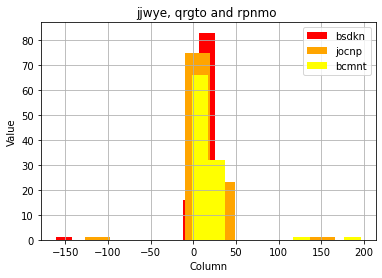

In [97]:
data['bsdkn'].hist(color="red", label='bsdkn')
data['jocnp'].hist(color="orange", label='jocnp')
data['bcmnt'].hist(color="yellow", label='bcmnt')

plt.title('jjwye, qrgto and rpnmo ')
plt.xlabel('Column')
plt.ylabel('Value')
plt.legend(loc='upper right');

##### Построить графики для каждой пары признаков в наборе данных

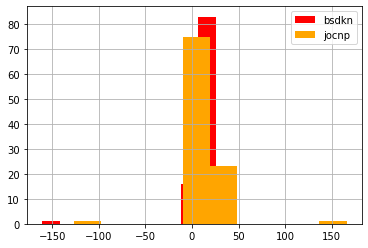

In [35]:
def first_pair():
    data['bsdkn'].hist(color="red", label='bsdkn')
    data['jocnp'].hist(color="orange", label='jocnp')
    plt.legend(loc='upper right')

first_pair()

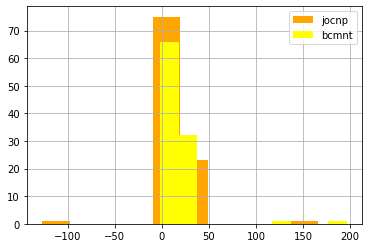

In [36]:
def second_pair():
    data['jocnp'].hist(color="orange", label='jocnp')
    data['bcmnt'].hist(color="yellow", label='bcmnt')
    plt.legend(loc='upper right')

second_pair()

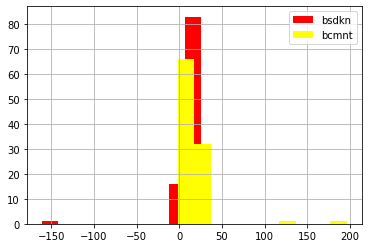

In [37]:
def third_pair():
    data['bsdkn'].hist(color="red", label='bsdkn')
    data['bcmnt'].hist(color="yellow", label='bcmnt')
    plt.legend(loc='upper right')
    
third_pair()

##### Построить гистограмму каждого из признаков

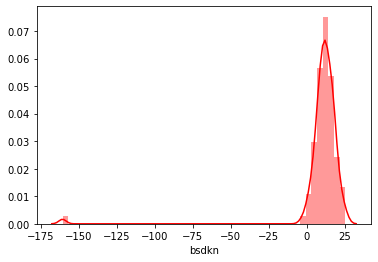

In [46]:
bsdkn_plot = sns.distplot(data['bsdkn'], color = 'red')

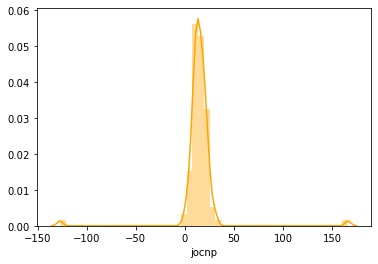

In [51]:
jocnp_plot = sns.distplot(data['jocnp'], color = 'orange')

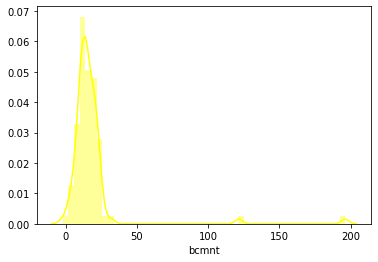

In [48]:
bcmnt_plot = sns.distplot(data['bcmnt'], color = 'yellow')

##### Найти выбросы. Удалить их #####

удалить всю строку данных из выборки


Поиск в гугле по поводу выбросов дал такую информацию: В статистике, если распределение данных приблизительно нормальное, то около 68% значений данных находятся в пределах одного стандартного отклонения от среднего, а около 95% находятся в пределах двух стандартных отклонений, иоколо 99,7% лежат в пределах трех стандартных отклонений.
Этим и воспользуемся: для каждого столбца найдем врехнюю и нижнюю границы, и удалим строки, в которых встречаются значения, выходящие за эти границы.

In [102]:
new_data = data.copy()

for col in new_data.columns:
    data_std = new_data[col].std()
    data_mean = new_data[col].mean()
    cut_off = data_std * 3
    lower_border = data_mean - cut_off
    upper_border = data_mean + cut_off
    col_data = new_data[col]
    new_data = new_data.drop(new_data[new_data[col] < lower_border].index)
    new_data = new_data.drop(new_data[new_data[col] > upper_border].index)

Графики с выбросами и без, для сравнения

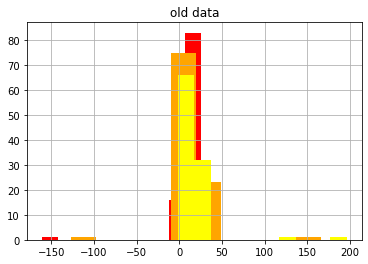

In [106]:
data['bsdkn'].hist(color="red", label='bsdkn')
data['jocnp'].hist(color="orange", label='jocnp')
data['bcmnt'].hist(color="yellow", label='bcmnt')
plt.title('old data');

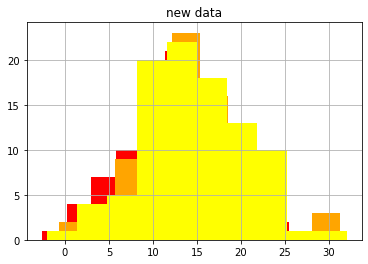

In [107]:
new_data['bsdkn'].hist(color="red", label='jjwye')
new_data['jocnp'].hist(color="orange", label='qrgto')
new_data['bcmnt'].hist(color="yellow", label='rpnmo')
plt.title('new data');

##### Найти новые средние и дисперсии, сравнить со старыми

In [113]:
print('Старые значения:')
print('Среднее:\n', data.mean())
print('\nДисперсия:\n', data.std())

Старые значения:
Среднее:
 bsdkn    10.486120
jocnp    14.804018
bcmnt    17.600850
dtype: float64

Дисперсия:
 bsdkn    18.147348
jocnp    21.721062
bcmnt    21.763582
dtype: float64


In [114]:
print('Новые значения:')
print('Среднее:\n', new_data.mean())
print('\nДисперсия:\n', new_data.std())

Новые значения:
Среднее:
 bsdkn    12.220002
jocnp    14.745829
bcmnt    14.751529
dtype: float64

Дисперсия:
 bsdkn    5.543152
jocnp    6.241492
bcmnt    5.835923
dtype: float64


##### Нормализовать данные по среднему и дисперсии

In [115]:
normalized_data = data.copy()

normalized_data = (data-data_mean) / data_std

normalized_data.head()

,bsdkn,jocnp,bcmnt
0,-0.063613,-0.833821,0.220750
1,-0.611101,-0.040111,0.023405
2,-0.081261,-0.355893,-0.365227
3,-0.177429,-0.042369,0.648453
4,-0.186146,-0.133203,-0.367570
